In [1]:

import pandas as pd
from google.colab import files
print("📂 Upload your raw Superstore CSV file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
print("\n✅ Raw data preview:")
display(df.head())
print("\n❗ Missing values in key columns:")
display(df[['Customer ID', 'Customer Name', 'Order Date', 'Sales']].isnull().sum())
df = df.dropna(subset=['Customer ID', 'Order Date', 'Sales'])
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')

df = df.dropna(subset=['Order Date'])

if 'Product ID' in df.columns:
    df = df.drop_duplicates(subset=['Order ID', 'Product ID'])
else:
    df = df.drop_duplicates(subset=['Order ID'])
df = df[df['Sales'] > 0]
print(f"\nCleaned dataset shape: {df.shape}")
display(df.head())


📂 Upload your raw Superstore CSV file


Saving train.csv to train.csv

✅ Raw data preview:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



❗ Missing values in key columns:


,0
Customer ID,0
Customer Name,0
Order Date,0
Sales,0



🔢 Cleaned dataset shape: (9792, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


✅ RFM Table created successfully!


,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,56,6,5086.935
4,AB-10015,416,3,886.156



📈 RFM Summary Statistics:


,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,149.286255,6.206810,2849.742112
std,187.081466,2.525647,2618.958370
min,1.000000,1.000000,4.833000
25%,31.000000,4.000000,1081.466000
50%,76.000000,6.000000,2215.002000
75%,185.000000,8.000000,3670.258000
max,1166.000000,17.000000,25043.050000


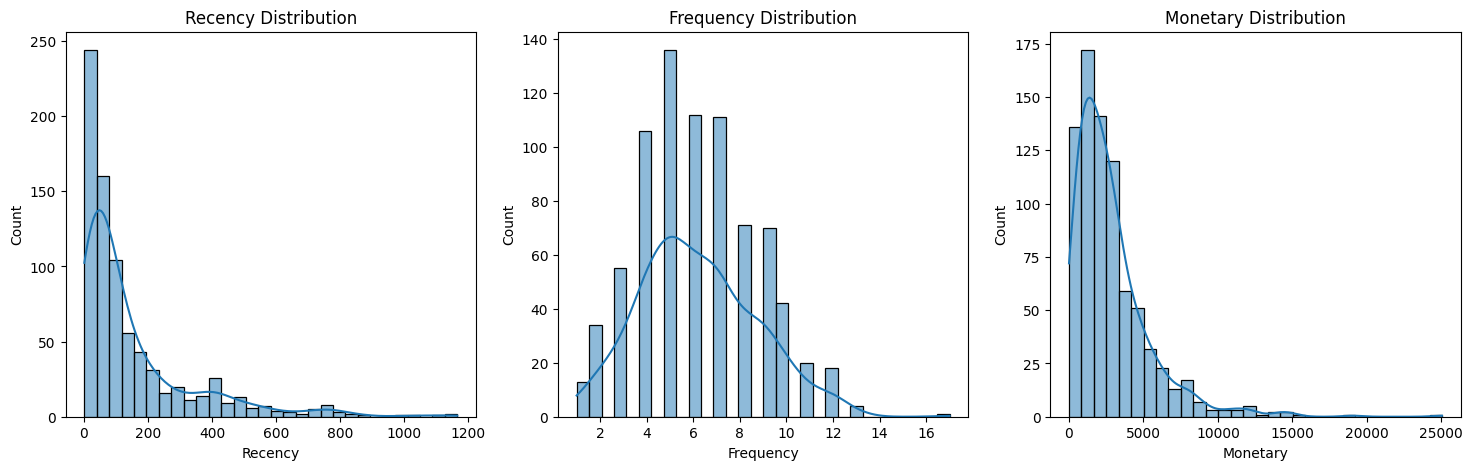

In [2]:

snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm_df = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).rename(columns={'Order Date': 'Recency',
                   'Order ID': 'Frequency',
                   'Sales': 'Monetary'}).reset_index()

print("RFM Table created successfully!")
display(rfm_df.head())
print("\nRFM Summary Statistics:")
display(rfm_df[['Recency', 'Frequency', 'Monetary']].describe())

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(rfm_df['Recency'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Recency Distribution')
sns.histplot(rfm_df['Frequency'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Frequency Distribution')
sns.histplot(rfm_df['Monetary'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Monetary Distribution')
plt.show()


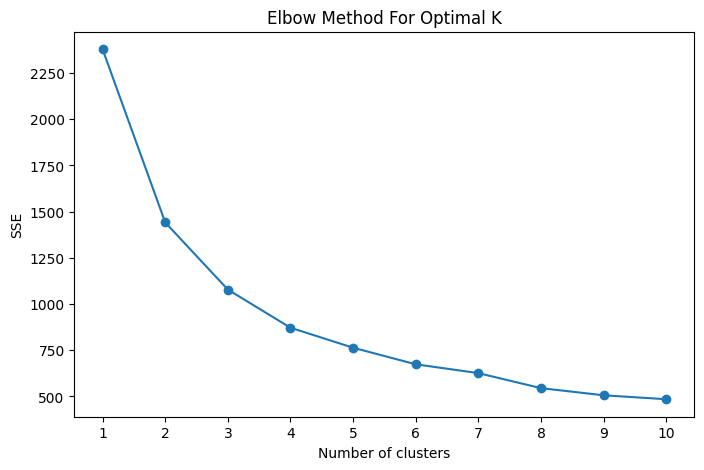


✅ Cluster counts:


,count
Cluster,
0,357
1,299
2,87
3,50


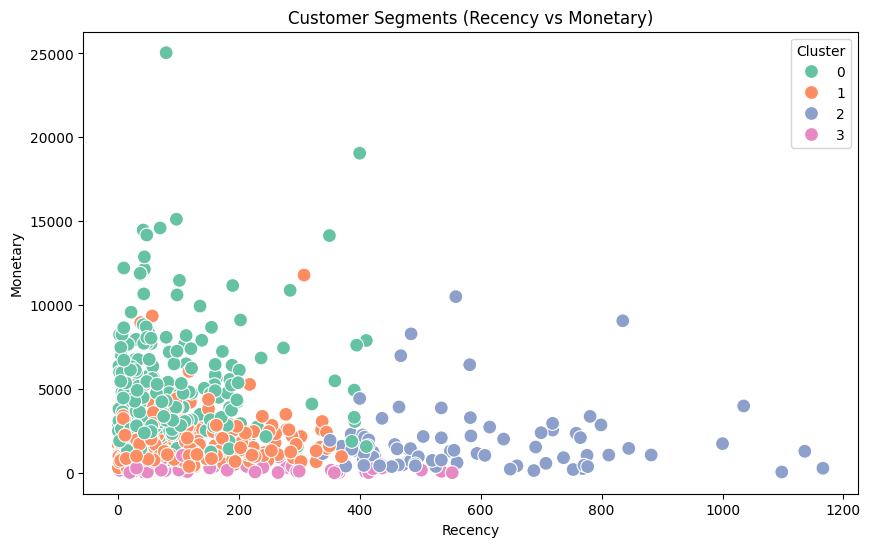

In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
rfm_log = rfm_df.copy()
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log[['Recency', 'Frequency', 'Monetary']])
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(range(1,11))
plt.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

print("\nCluster counts:")
display(rfm_df['Cluster'].value_counts())

import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (Recency vs Monetary)')
plt.show()


In [4]:

cluster_profile = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)
cluster_profile.columns = ['Recency_mean', 'Frequency_mean', 'Monetary_mean', 'Customer_Count']
cluster_profile = cluster_profile.reset_index()
print("Cluster profiling:")
display(cluster_profile)
def label_cluster(row):
    if row['Recency_mean'] <= 60 and row['Frequency_mean'] >= 8 and row['Monetary_mean'] >= 5000:
        return 'VIP'
    elif row['Recency_mean'] <= 90 and row['Frequency_mean'] >= 6:
        return 'Loyal'
    elif row['Recency_mean'] > 180 and row['Monetary_mean'] < 1000:
        return 'At-Risk'
    else:
        return 'Need Attention'

cluster_profile['Segment_Label'] = cluster_profile.apply(label_cluster, axis=1)

print("\nCluster segments with descriptive labels:")
display(cluster_profile)
rfm_df = rfm_df.merge(cluster_profile[['Cluster', 'Segment_Label']], on='Cluster', how='left')
print("\nSample customers with segment labels:")
display(rfm_df.head())


✅ Cluster profiling:


,Cluster,Recency_mean,Frequency_mean,Monetary_mean,Customer_Count
0,0,76.83,8.34,4363.24,357
1,1,103.95,4.96,1776.12,299
2,2,580.09,3.85,1804.63,87
3,3,188.10,2.48,282.14,50



✅ Cluster segments with descriptive labels:


,Cluster,Recency_mean,Frequency_mean,Monetary_mean,Customer_Count,Segment_Label
0,0,76.83,8.34,4363.24,357,Loyal
1,1,103.95,4.96,1776.12,299,Need Attention
2,2,580.09,3.85,1804.63,87,Need Attention
3,3,188.10,2.48,282.14,50,At-Risk



🔍 Sample customers with segment labels:


,Customer ID,Recency,Frequency,Monetary,Cluster,Segment_Label
0,AA-10315,185,5,5563.560,0,Loyal
1,AA-10375,20,9,1056.390,0,Loyal
2,AA-10480,260,4,1790.512,1,Need Attention
3,AA-10645,56,6,5086.935,0,Loyal
4,AB-10015,416,3,886.156,2,Need Attention


In [5]:

cluster_label_map = {
    0: 'VIP',
    1: 'Loyal',
    2: 'Dormant',
    3: 'At-Risk'
}
rfm_df['Segment_Label'] = rfm_df['Cluster'].map(cluster_label_map)
cluster_profile['Segment_Label'] = cluster_profile['Cluster'].map(cluster_label_map)
print("Updated Segment Labels:")
display(cluster_profile)
print("\n🔍 Sample customers with new segment labels:")
display(rfm_df.head())


✅ Updated Segment Labels:


,Cluster,Recency_mean,Frequency_mean,Monetary_mean,Customer_Count,Segment_Label
0,0,76.83,8.34,4363.24,357,VIP
1,1,103.95,4.96,1776.12,299,Loyal
2,2,580.09,3.85,1804.63,87,Dormant
3,3,188.10,2.48,282.14,50,At-Risk



🔍 Sample customers with new segment labels:


,Customer ID,Recency,Frequency,Monetary,Cluster,Segment_Label
0,AA-10315,185,5,5563.560,0,VIP
1,AA-10375,20,9,1056.390,0,VIP
2,AA-10480,260,4,1790.512,1,Loyal
3,AA-10645,56,6,5086.935,0,VIP
4,AB-10015,416,3,886.156,2,Dormant


In [6]:

import joblib
from google.colab import files
joblib.dump(kmeans, 'kmeans_rfm_model.pkl')
files.download('kmeans_rfm_model.pkl')
joblib.dump(scaler, 'rfm_scaler.pkl')
files.download('rfm_scaler.pkl')
rfm_df.to_csv('customer_segments.csv', index=False)
files.download('customer_segments.csv')

print("Model 2 deliverables saved and ready for download:")
print("- kmeans_rfm_model.pkl (trained K-Means model)")
print("- rfm_scaler.pkl (feature scaler)")
print("- customer_segments.csv (clustered customers with segment labels)")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 2 deliverables saved and ready for download:
- kmeans_rfm_model.pkl (trained K-Means model)
- rfm_scaler.pkl (feature scaler)
- customer_segments.csv (clustered customers with segment labels)
